<a href="https://colab.research.google.com/github/cvaranasi1/NeuralNetworks_in_TensorFlow/blob/master/Imdb_built_in_tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
import tensorflow_datasets as tfds
imdb, info = tfds.load ("imdb_reviews/subwords8k",as_supervised=True,with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVSFWPA/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVSFWPA/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteVSFWPA/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train, test = imdb['train'], imdb['test']
tokenizer=info.features['text'].encoder
s = "I am Chandra Varanasi"
e = tokenizer.encode(s)
d = tokenizer.decode(e)
print(e)
print(d)

[12, 258, 1555, 2558, 7961, 2733, 5119, 2820]
I am Chandra Varanasi


In [ ]:
tds=train.shuffle(10000)
padded_train=tds.padded_batch(batch_size=64,padded_shapes=train.output_shapes)
padded_test=test.padded_batch(batch_size=64, padded_shapes=test.output_shapes)

In [ ]:
model = keras.models.Sequential()
model.add(layers.Embedding(tokenizer.vocab_size,64))
model.add(layers.GlobalAveragePooling1D())
model.add(layers.Dense(6,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(padded_train,epochs=10,validation_data=padded_test)

Epoch 1/10
391/391 [==============================] - 11s 27ms/step - loss: 0.6836 - accuracy: 0.5793 - val_loss: 0.6577 - val_accuracy: 0.6633
Epoch 2/10
391/391 [==============================] - 10s 27ms/step - loss: 0.5879 - accuracy: 0.7586 - val_loss: 0.5357 - val_accuracy: 0.7319
Epoch 3/10
391/391 [==============================] - 10s 26ms/step - loss: 0.4557 - accuracy: 0.8610 - val_loss: 0.4310 - val_accuracy: 0.8610
Epoch 4/10
391/391 [==============================] - 10s 25ms/step - loss: 0.3716 - accuracy: 0.8903 - val_loss: 0.3788 - val_accuracy: 0.8748
Epoch 5/10
391/391 [==============================] - 10s 26ms/step - loss: 0.3172 - accuracy: 0.9064 - val_loss: 0.3483 - val_accuracy: 0.8779
Epoch 6/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2750 - accuracy: 0.9198 - val_loss: 0.3395 - val_accuracy: 0.8724
Epoch 7/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2483 - accuracy: 0.9238 - val_loss: 0.3416 - val_accuracy:

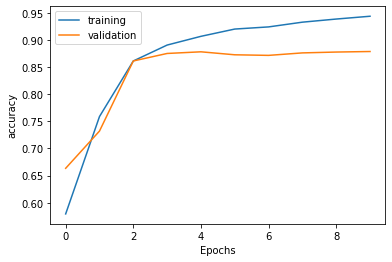

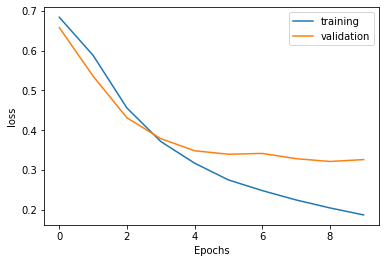

In [ ]:
import matplotlib.pyplot as plt
def plotData(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend(['training', 'validation'])
  plt.show()

plotData(history,'accuracy')
plotData(history,'loss')
